## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import pickle as pkl
from datetime import datetime
from dateutil import parser

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['axes.axisbelow'] = True

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.io as pio
init_notebook_mode(True)

from hallprobecalib import hpc_ext_path
from hallprobecalib.hpcplots import scatter2d,scatter3d,histo

## Day 1: Gradient Plots

In [5]:
plotdir = hpc_ext_path+'plots/magnet_maps/2019-05-16_partial/'

In [7]:
directory = hpc_ext_path+'datafiles/magnet_maps/'
filename = '2019-05-16 102515.txt'

In [8]:
df = pd.read_csv(directory+filename)

In [9]:
df.describe()

,Magnet Current [V],Magnet Voltage [V],NMR [T],NMR [FFT],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_MicroStep_X,Zaber_Meas_Encoder_X,Zaber_Meas_MicroStep_Y,Zaber_Meas_Encoder_Y,Zaber_Meas_MicroStep_Z,Zaber_Meas_Encoder_Z
count,21487.000000,21487.000000,21487.000000,21487.0,21487.000000,21487.000000,2.148700e+04,21487.000000,21487.000000,21487.000000,21487.000000,2.148700e+04,21487.000000
mean,8.943737,40.345804,0.789096,0.0,506817.183274,449680.279006,1.599985e+06,506817.183274,197975.462216,449680.279006,175656.358987,1.599985e+06,624994.109320
std,0.000020,0.080311,0.663810,0.0,4472.819792,29262.486298,2.943887e+04,4472.819792,1747.195231,29262.486298,11430.658710,2.943887e+04,11499.558759
min,8.943694,40.114370,0.000000,0.0,500000.000000,400000.000000,1.550000e+06,500000.000000,195312.500000,400000.000000,156250.000000,1.550000e+06,605468.750000
25%,8.943722,40.291735,0.000000,0.0,501961.000000,423532.000000,1.573532e+06,501961.000000,196078.515625,423532.000000,165442.187500,1.573532e+06,614660.937500
50%,8.943734,40.327110,1.347410,0.0,505883.000000,449025.000000,1.599025e+06,505883.000000,197610.546875,449025.000000,175400.390625,1.599025e+06,624619.140625
75%,8.943751,40.434690,1.347691,0.0,509805.000000,474518.000000,1.624518e+06,509805.000000,199142.578125,474518.000000,185358.593750,1.624518e+06,634577.343750
max,8.943786,40.487020,1.348036,0.0,513727.000000,500011.000000,1.650011e+06,513727.000000,200674.609375,500011.000000,195316.796875,1.650011e+06,644535.546875


In [10]:
drops = [col for col in list(df.columns) if ("MicroStep" in col) or ("FFT" in col)]

df.drop(drops,axis=1,inplace=True)

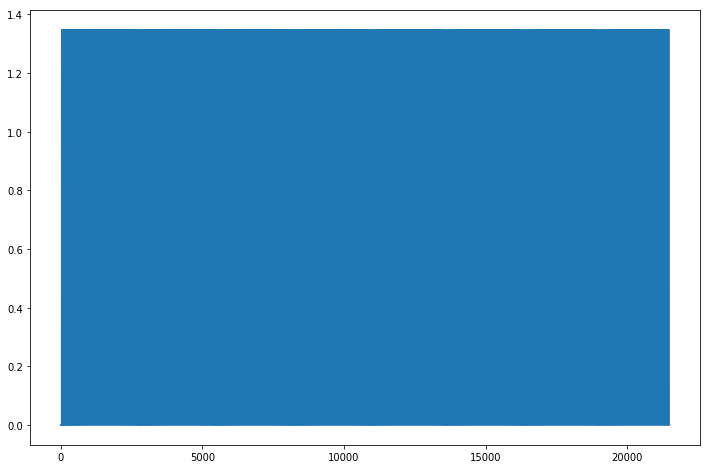

In [11]:
df['NMR [T]'].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3578a30048>,
      dtype=object)

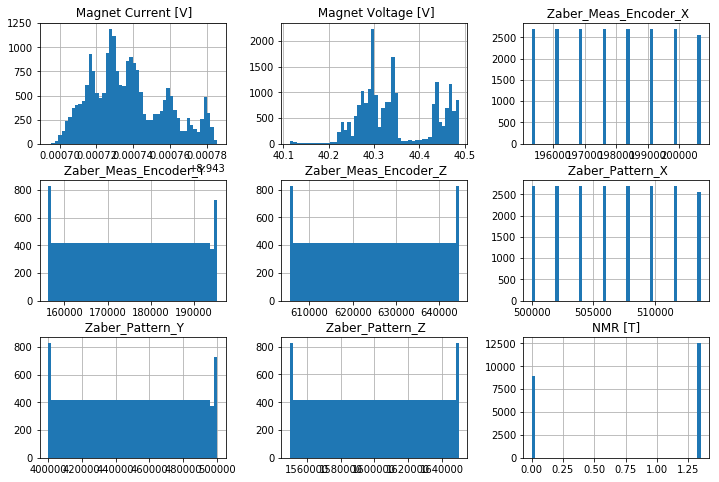

In [12]:
df.hist(bins=50)

In [13]:
notzero = df['NMR [T]'] != 0

df_nz = df[notzero]

In [14]:
len(df_nz)

12583

In [15]:
len(df)

21487

In [16]:
len(df_nz)/len(df)

0.5856099036626797

In [17]:
df_nz.describe()

,Magnet Current [V],Magnet Voltage [V],NMR [T],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Encoder_Z
count,12583.000000,12583.000000,12583.000000,12583.000000,12583.000000,1.258300e+04,12583.000000,12583.000000,12583.000000
mean,8.943737,40.347277,1.347477,506881.967655,451557.484304,1.620660e+06,198000.768615,176389.642306,633070.272081
std,0.000020,0.080517,0.003452,4461.580548,27835.243168,1.792855e+04,1742.804902,10873.141863,7003.338864
min,8.943694,40.114370,1.102329,500000.000000,400000.000000,1.583337e+06,195312.500000,156250.000000,618491.015625
25%,8.943721,40.291920,1.347502,503922.000000,429415.000000,1.606869e+06,196844.531250,167740.234375,627683.203125
50%,8.943734,40.331610,1.347657,507844.000000,452947.000000,1.620596e+06,198376.562500,176932.421875,633045.312500
75%,8.943750,40.434930,1.347771,509805.000000,474518.000000,1.636284e+06,199142.578125,185358.593750,639173.437500
max,8.943785,40.486860,1.348036,513727.000000,500011.000000,1.650011e+06,200674.609375,195316.796875,644535.546875


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f357874c048>,
      dtype=object)

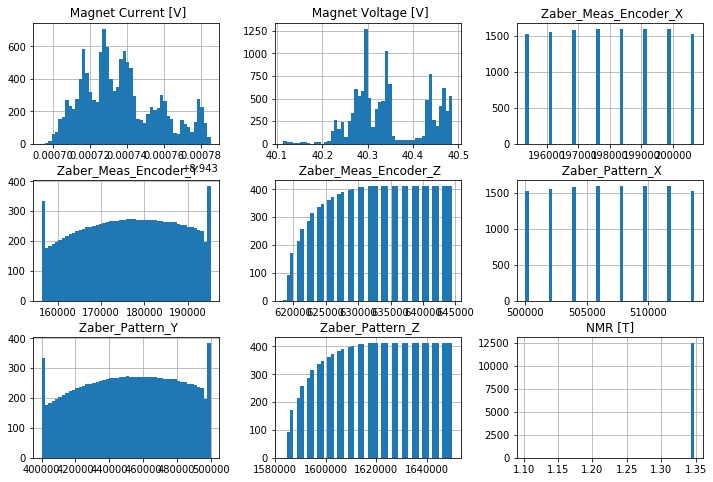

In [18]:
df_nz.hist(bins=50)

In [32]:
df_nz['NMR [T]'].quantile(0.1)

1.347355664

In [27]:
df_nz['NMR [T]'].quantile(0.015)

1.34701860982

In [33]:
histo(df_nz['NMR [T]'],bins=50,yscale='log',inline=True);

In [34]:
c2 = df_nz['NMR [T]'] >= df_nz['NMR [T]'].quantile(0.015)

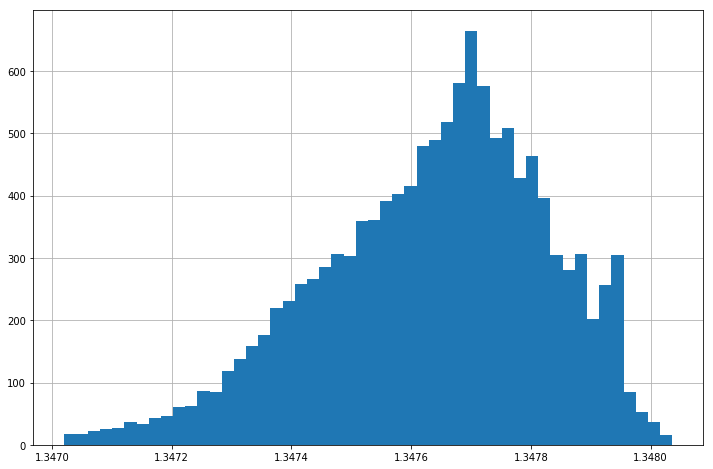

In [35]:
df_nz[c2]['NMR [T]'].hist(bins=50)

In [36]:
df_nz[c2]['NMR [T]'].describe()

count    12394.000000
mean         1.347636
std          0.000190
min          1.347019
25%          1.347511
50%          1.347660
75%          1.347773
max          1.348036
Name: NMR [T], dtype: float64

In [37]:
scatter3d(df_nz[' Zaber_Pattern_X'],df_nz[' Zaber_Pattern_Y'],df_nz[' Zaber_Pattern_Z'],scale_list=[df_nz['NMR [T]']]);

In [44]:
fig = scatter3d(df[' Zaber_Pattern_X'],df[' Zaber_Pattern_Y'],df[' Zaber_Pattern_Z'],scale_list=[df['NMR [T]']]);

In [39]:
pio.write_image(fig, plotdir+'nmr_full_finergrid2_2019-05-16.pdf')

### Gradient

In [45]:
df_c = df[df[" Zaber_Pattern_X"] < 513000.]

In [46]:
x = df_c[' Zaber_Pattern_X'].unique()
y = df_c[' Zaber_Pattern_Y'].unique()
z = df_c[' Zaber_Pattern_Z'].unique()

In [47]:
ff = np.array(df_c['NMR [T]'])
ff = np.reshape(ff,(len(x),len(y),len(z)))

In [48]:
gradx, grady, gradz = np.gradient(ff,x,y,z)

In [49]:
gradmag = (gradx**2+grady**2+gradz**2)**(1/2)

In [50]:
gradx = pd.Series(gradx.flatten())
grady = pd.Series(grady.flatten())
gradz = pd.Series(gradz.flatten())

In [51]:
gradmag = pd.Series(gradmag.flatten())

In [52]:
df_c['GRAD_B_X'],df_c['GRAD_B_Y'],df_c['GRAD_B_Z'],df_c['GRAD_B_MAG'] = (gradx,grady,gradz,gradmag)

In [53]:
notzero = df_c['NMR [T]'] != 0

In [54]:
df_g = df_c[notzero]

In [55]:
#g_cut = df_g["GRAD_B_MAG"] <= df_g["GRAD_B_MAG"].quantile(0.2)
g_cut = df_g["GRAD_B_MAG"] <= df_g["GRAD_B_MAG"].quantile(0.1)

In [56]:
fig = scatter3d([df_g[g_cut][' Zaber_Pattern_X'],df_g[' Zaber_Pattern_X']],[df_g[g_cut][' Zaber_Pattern_Y'],df_g[' Zaber_Pattern_Y']],[df_g[g_cut][' Zaber_Pattern_Z'],df_g[' Zaber_Pattern_Z']],scale_list=[df_g[g_cut]['GRAD_B_MAG'],df_g["GRAD_B_MAG"]],opacity_list=[1.,0.25],colors_list=['Hot','Viridis'],inline=False);

In [57]:
#fig.layout.xaxis.title='Zaber_Pattern_Z (microns)'
fig.layout.scene.xaxis = dict(title=r"Zaber_Pattern_X")
fig.layout.scene.yaxis = dict(title=r"Zaber_Pattern_Y")
fig.layout.scene.zaxis = dict(title=r"Zaber_Pattern_Z")
fig.layout.title = "|grad(B)| vs. x,y,z: Gradient Cut"

In [58]:
plot(fig,filename=plotdir+'gradient_cut_2019-05-16.html')
pio.write_image(fig,plotdir+'gradient_cut_2019-05-16.pdf')

Hasn't actually reached the high-uniformity region, so there aren't any good chunks. Will not do position cut on this one.

In [59]:
df_g.describe()

,Magnet Current [V],Magnet Voltage [V],NMR [T],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Encoder_Z,GRAD_B_X,GRAD_B_Y,GRAD_B_Z,GRAD_B_MAG
count,11057.000000,11057.000000,11057.000000,11057.000000,11057.000000,1.105700e+04,11057.000000,11057.000000,11057.000000,1.105700e+04,1.105700e+04,1.105700e+04,1.105700e+04
mean,8.943739,40.334068,1.347490,505937.270236,451913.382563,1.620728e+06,197631.746186,176528.665064,633096.925202,2.437902e-06,1.564167e-06,1.135534e-05,1.486696e-05
std,0.000020,0.076928,0.003616,3910.699968,27955.158522,1.790621e+04,1527.617175,10919.983798,6994.613959,3.669601e-05,3.939802e-05,6.130096e-05,8.107348e-05
min,8.943703,40.114370,1.102329,500000.000000,400000.000000,1.583337e+06,195312.500000,156250.000000,618491.015625,-3.435805e-04,-3.436294e-04,-3.034498e-08,1.590954e-09
25%,8.943724,40.283710,1.347527,501961.000000,429415.000000,1.606869e+06,196078.515625,167740.234375,627683.203125,-2.909001e-08,-4.067823e-09,-2.506374e-10,2.169143e-08
50%,8.943737,40.319290,1.347677,505883.000000,452947.000000,1.620596e+06,197610.546875,176932.421875,633045.312500,-2.425038e-08,2.681540e-09,3.805711e-09,2.770435e-08
75%,8.943754,40.351350,1.347789,509805.000000,474518.000000,1.636284e+06,199142.578125,185358.593750,639173.437500,-1.923304e-08,9.783019e-09,1.109255e-08,3.375867e-08
max,8.943785,40.486860,1.348036,511766.000000,500011.000000,1.650011e+06,199908.593750,195316.796875,644535.546875,6.870822e-04,3.436188e-04,3.436348e-04,8.414751e-04


In [60]:
df_g[g_cut].describe()

,Magnet Current [V],Magnet Voltage [V],NMR [T],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Encoder_Z,GRAD_B_X,GRAD_B_Y,GRAD_B_Z,GRAD_B_MAG
count,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1.106000e+03,1106.000000,1106.000000,1106.000000,1.106000e+03,1.106000e+03,1.106000e+03,1.106000e+03
mean,8.943741,40.312543,1.347790,503457.459313,459870.783906,1.630701e+06,196663.070044,179637.024963,636992.440029,-1.016659e-08,-1.297222e-10,1.533271e-09,1.274873e-08
std,0.000014,0.079889,0.000182,4522.045652,22558.073372,1.651696e+04,1766.424083,8811.747411,6451.936435,5.147405e-09,4.886891e-09,5.109082e-09,4.430118e-09
min,8.943706,40.114410,1.347244,500000.000000,400000.000000,1.587259e+06,195312.500000,156250.000000,620023.046875,-1.769276e-08,-1.623967e-08,-1.651071e-08,1.590954e-09
25%,8.943730,40.273362,1.347709,500000.000000,447064.000000,1.624518e+06,195312.500000,174634.375000,634577.343750,-1.454271e-08,-3.362060e-09,-1.114674e-09,9.462332e-09
50%,8.943743,40.280860,1.347857,500000.000000,460791.000000,1.634323e+06,195312.500000,179996.484375,638407.421875,-1.045334e-08,9.841917e-11,6.172871e-10,1.419444e-08
75%,8.943754,40.341158,1.347933,507844.000000,476479.000000,1.644128e+06,198376.562500,186124.609375,642237.500000,-7.497578e-09,3.702193e-09,3.700153e-09,1.665924e-08
max,8.943766,40.486580,1.348022,511766.000000,500011.000000,1.650011e+06,199908.593750,195316.796875,644535.546875,9.949516e-09,1.301224e-08,1.521367e-08,1.775610e-08


Even after the first cut it's clearly worse than in the full dataset, yet another confirmation that the gradient method is doing the correct thing.

In [61]:
histo(df_g[g_cut]['NMR [T]'],bins=25,inline=True);